In [2]:
from keras import Sequential
from keras.layers import Conv2D, Flatten, Activation, MaxPooling2D, AvgPool2D, Dense
from keras.utils.np_utils import to_categorical
import keras.backend as k
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

170500096/170498071 [==============================] - 47s 0us/step


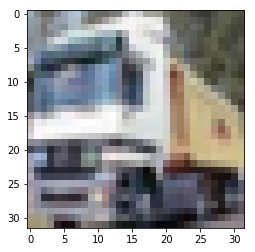

In [4]:
'''loading the cifar data'''

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
plt.imshow(X_train[1])

In [5]:
'''normalization'''

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [6]:
'''converting into categorical data'''

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
''' convolutional layer architecture '''

model = Sequential()

# no of filters is what we specify in Conv2D
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [10]:
'''evaluating the model'''

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 279s 6ms/step - loss: 1.3371 - acc: 0.5208 - val_loss: 1.0300 - val_acc: 0.6363
Epoch 2/2
50000/50000 [==============================] - 293s 6ms/step - loss: 0.8691 - acc: 0.6937 - val_loss: 0.8653 - val_acc: 0.7005
